# TREE

#### Boletín 3: árboles

Para la realización de las prácticas correspondientes a este boletín se utilizará scikit-learn en el CESGA.
Debes seleccionar SEED_VALUE=1.

### Instrucciones para la experimentación en TODOS los boletines de prácticas

En los diferentes ejercicios que se realizarán durante el curso, existen una serie de operaciones con una componente aleatoria: la división en entrenamiento y test, el aprendizaje de un modelo o incluso, en
algunos casos, el test del modelo. Como norma general de experimentación es interesante asegurar la repetibilidad de los experimentos, eliminando la aleatoriedad, puesto que nos permite depurar errores,
comparar modelos, etc. Además, para la evaluación de los boletines también es imprescindible eliminar esa aleatoriedad.

Para ello vamos a fijar la semilla del generador de números aleatorios, de tal manera que su secuencia sea siempre la misma. La semilla se establece mediante el comando np.random.seed(SEED_VALUE), y
en este boletín utilizaremos un SEED_VALUE=1. Será necesario utilizar este comando inmediatamente antes de cualquier operación con un componente aleatorio. Esto incluye: train_test_split(), fit(),
predict(), etc. En aquellas funciones que lo admitan, sustituiremos el comando np.random.seed(SEED_VALUE) por el argumento random_state=SEED_VALUE.

## Importamos las librerías a utilizar

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
import matplotlib

import os
import itertools

In [24]:
%matplotlib inline
matplotlib.style.use('ggplot')
#np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  # Para evitar warnings en algunas gráficas
import warnings

# Filtrar y ocultar todos los warnings
warnings.filterwarnings('ignore')

## Definimos variables globales

In [25]:
DATASET_NAME = './data/Exercice.data'
DATASET_DELIMITER = ','
SEED_VALUE = 1  # NO CAMBIES ESTA SEMILLA, así todos tendremos los mismos resultados

### Ejercicio 1

Dado el siguiente conjunto de datos de clasificación con 6 observaciones, 3 variables de entrada y
una variable de salida:


## Leemos el fichero de datos

In [26]:

if os.path.exists(DATASET_NAME):
    dataset = pd.read_csv(DATASET_NAME, 
                          delimiter=DATASET_DELIMITER,
                          skiprows=0,
                          header=None,
                          names = ["X1", "X2", "X3", "Y"])
else:
    dataset = d.DataFrame(np.array(
    [[ 1,  4,  3, -1,  1],
       [ 2, -3, -1, -1,  0],
       [ 3,  3, -2,  0,  0],
       [ 4,  1,  4,  0,  1],
       [ 5, -2,  3,  1,  0],
       [ 6, -3,  5,  5,  0]]), columns=['X1', 'X2', 'X3', 'Y'])
dataset

,X1,X2,X3,Y
1,4,3,-1,1
2,-3,-1,-1,0
3,3,-2,0,0
4,1,4,0,1
5,-2,3,1,0
6,-3,5,5,0


El fichero contiene 3 variables y 17 observaciones distintas. Las variables predictoras son `X0` y `X1`, y la variable dependiente sería `Y`. Estamos ante un problema de clasificación binario (dada la naturaleza booleana de `Y`, existen 2 clases).

## Visualizamos los datos

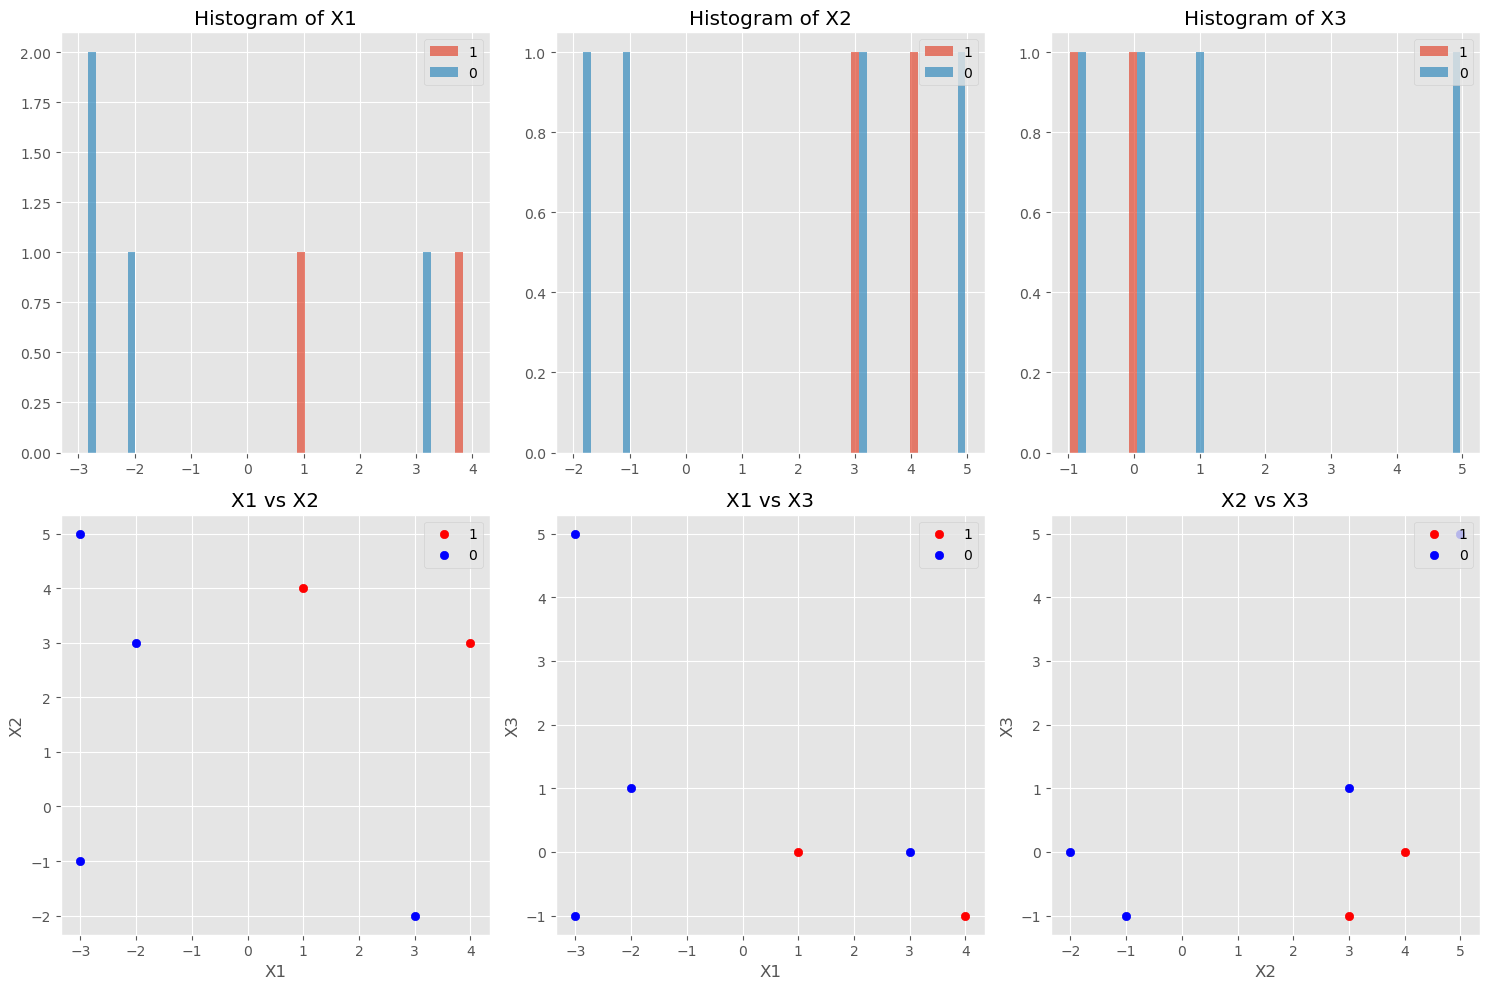

In [27]:

columns = dataset.columns[:-1]  # Exclude the 'Y' column

# Create a 2x3 subplot grid for both histogram and scatter plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Visualize histograms for the first three columns
for i, column in enumerate(columns[:3]):
    axs[0, i].hist([dataset[dataset['Y'] == 1][column], dataset[dataset['Y'] == 0][column]], label=['1', '0'], bins=20, alpha=0.7)
    axs[0, i].set_title(f'Histogram of {column}')
    axs[0, i].legend(loc='upper right')

# Create combinations of variables for scatter plot comparison
combinations = list(itertools.combinations(columns, 2))

# Visualize scatter plots for the remaining combinations
for j, (var1, var2) in enumerate(combinations):
    k = j + 1  # Start from the second row
    scatter1 = axs[1, j].scatter(dataset[dataset['Y'] == 1][var1], dataset[dataset['Y'] == 1][var2], c='red', label='1')
    scatter0 = axs[1, j].scatter(dataset[dataset['Y'] == 0][var1], dataset[dataset['Y'] == 0][var2], c='blue', label='0')
    axs[1, j].set_title(f'{var1} vs {var2}')
    axs[1, j].set_xlabel(var1)
    axs[1, j].set_ylabel(var2)
    axs[1, j].legend(handles=[scatter1, scatter0], loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

Construye el árbol de clasificación (sin podar) mediante CART y utilizando como criterio la entropía.
La condición de parada debe ser que los nodos hoja sean puros (todos los ejemplos son de la misma
clase). 

En cada nodo del árbol se debe indicar:
- La variable y su valor umbral.
- La entropía correspondiente.
- En los nodos hoja, la clase del nodo y los ejemplos que pertenecen al mismo.

**Nota:** este ejercicio debe hacerse sin utilizar ninguna función de scikit-learn.

ecuación de entropia:

$$ H(X) = -\sum_{i=1}^{n} P(x_i) \log_2 P(x_i) $$

- H(X) representa la entropía del nodo.

- P(xi​) es la probabilidad de cada clase ii, y la sumatoria se realiza sobre todas las clases nn en el conjunto de datos.

Para saber cual es la mejor división se usa esta ecuación

$$ H(X) = entropia_{right} \times numitems_{right} + numitems_{left} \times entropia_{left} $$

- H(X) representa la entropía del de la división- H(X) representa la entropía del árbol.

In [28]:
a=np.array([0,1,1])
np.where(a == 1)[0]
len(np.where(a == 1)[0])

2

In [29]:
from collections import Counter
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter


class Nodo:
    def __init__(self,values,father=None,index=0,show=False):
        """
        values: value of variable ( array )
        labels: lables class in order ( array )
        self itemem
        """
        
        self.values=values
        self.labels=values[-1]
        self.show=show
        if self.show:
            print('valores_iniciales',self.values)
        self.cant_values=len(self.labels)
        self.class_names=np.unique(self.labels)
        self.values_per_variable=[]
        self.entropia=self.get_entropia()
        self.index=index
        self.depth= 0 if father is None else father.depth + 1
        self.father=father 
        self.left=None
        self.rigth=None
        self.umbral=None
        self.id = f'Node {self.depth}-{self.index}'
        self.variante=0
        
    def procesar_entradas(self,indice=0):
        
   
        xi=self.values[indice].T
        
        subsets_xi = [self.values.T[xi == value] for value in np.unique(xi)]
        #print(xi)
        xi=[i.T[indice] for i in subsets_xi]
        self.values_per_variable.append(np.array([item for array in subsets_xi for item in array.tolist()]))
        xi=[item for array in xi for item in array.tolist()]
        #print("a",xi,subsets_xi)
        #print("a", self.values_per_variable)
        #self.values_per_variable.append(xi)
        y1=[i.T[-1] for i in subsets_xi]
        y1=[item for array in y1 for item in array.tolist()]
        #print("label_nodo",y1,subsets_xi)
        return y1
    
    def get_entropia(self):
        entropia_min=[]
        
        for i,_ in enumerate(self.values[:-1]):
            labels_sorted=self.procesar_entradas(i)
            #print(labels_sorted)
            entropia=-np.sum(np.array(list(map(lambda class_name: 
                                               self.entropia_val(class_name,labels_sorted), self.class_names))))
            #print(entropia)
            entropia_min.append(entropia)
              
        return np.array(entropia_min)
    
    def entropia_val(self,class_name,labels_sorted):
        #print('label',labels_sorted)
        p=len(np.where(labels_sorted == class_name)[0])/ self.cant_values
        return p * math.log(p, 2) if p > 0 else 0  # Evita el logaritmo de cero
    
    def get_umbral(self,split_entropias,variante):
        
        values=self.values_per_variable[variante].T[variante]
        if self.show:
            print(values)
        return (values[split_entropias-1]+values[split_entropias])/2
    
    def generate_new_nodo_only_one(self,valor):
        
        return np.array([[valor[0]],[valor[1]]])
    
    def get_best_split(self):
        
        entropias_all_split=np.matrix([self.get_entropia_split(i+1) for i in range(self.cant_values-1)])
        split_entropias=np.argmin(entropias_all_split)
        split_entropias,variante=np.unravel_index(split_entropias, entropias_all_split.shape)#np.argmin(entropias_all_split)
        if self.show:
            print(entropias_all_split,split_entropias,variante)
        if self.cant_values-split_entropias>1 and len(entropias_all_split)>1:
           
            split_entropias+=1
            
        #print(entropias_all_split,split_entropias,len(entropias_all_split)>1)
        if len(entropias_all_split)>1:
            if self.show:
                print("nuevo_nodo",self.values_per_variable[variante][:split_entropias].T)
            self.rigth=Nodo(self.values_per_variable[variante][:split_entropias].T
                            ,self,0,show=False)
            self.left=Nodo(self.values_per_variable[variante][split_entropias:].T
                           ,self,1,show=False)
            self.values=self.values_per_variable[variante].T
            self.labels=self.values[-1]
            self.umbral=self.get_umbral(split_entropias,variante)

        elif self.cant_values>1:
            if self.show:
                print("nuevo_nodo_solo",np.array(self.values_per_variable[variante][0]))
            self.rigth=Nodo(self.generate_new_nodo_only_one(self.values_per_variable[variante][0])
                             ,self,0,show=False)
            self.left=Nodo(self.generate_new_nodo_only_one(self.values_per_variable[variante][1])
                           ,self,1,show=False)
            self.umbral=self.get_umbral(1,variante)
        
        self.variante=variante
        return self.rigth,self.left
    
    def get_entropia_split(self,i):
        entropia=[]
        for variante,_ in enumerate(self.values_per_variable):
            nodo_probe_1=Nodo(self.values_per_variable[variante][:i].T)
            nodo_probe_2=Nodo(self.values_per_variable[variante][i:].T)
            entropia.append(nodo_probe_1.entropia[variante]* self.cant_values +
                            nodo_probe_2.cant_values*nodo_probe_2.entropia[variante])
        return entropia
    
    def get_entropia_value(self):
        if self.show:
            print('self.entropia',self.entropia)
        return np.min(self.entropia)
    
    def __str__(self):
        return f"{self.id },{self.cant_values},{self.labels}"#f"{self.umbral},{self.rigth},{self.left}"

    def draw(self, G, pos=None, labels=None, parent_name=None):
        # If this is the first call, create new structures
        if pos is None:
            pos = {}
        if labels is None:
            labels = {}
        if self.show:
            print(self.values)   
            print(self.labels)
        # Create a unique identifier for the current node
        node_id = f'Node {self.depth}-{self.index}'
        labels[node_id] = (f'umbral para X{self.variante}= {self.umbral}\nsamples={self.cant_values}\nentropy={self.get_entropia_value():.3f}'
        f'\nvalue={self.values.T}\nlabel={self.labels}\nclass={Counter(self.labels).most_common(1)[0][0]}')
        
        # Determine the position of the current node based on its depth and index
        pos[node_id] = (self.index, -self.depth)
        #print(pos)
        # Add the current node to the graph
        G.add_node(node_id)

        # If this node has a parent, add an edge from the parent to this node
        if parent_name is not None:
            G.add_edge(parent_name, node_id)
        
        # Recursively draw the children
        if self.left is not None:
           
            self.left.draw(G, pos, labels, node_id)
            
        if self.rigth is not None:
            self.rigth.draw(G, pos, labels, node_id)

        return G, pos, labels
    
class Tree_class:
    def __init__(self,values,num_nodos=-1,pure=True):
        self.root=Nodo(values)
        self.next=[self.root]
        cont=0
        while True: 
            element=self.next.pop()
            #print(element)
            if element.get_entropia_value()>0:
                right,left=element.get_best_split()
                #print(right,left)
                if left is not None:
                    self.next.append(right)
                    self.next.append(left)
            #print(self.next)
            cont=+1
            if len(self.next)<=0 or cont==2:
                break
            
    def draw_tree(self):
        G = nx.DiGraph()
        # Start the recursive drawing from the root
        G, pos, labels = self.root.draw(G)
        
        # Draw the graph
        plt.figure(figsize=(12, 8))
        #nx.draw(G, pos, labels=labels, with_labels=True, arrows=False)
        # Draw the nodes
        nx.draw_networkx_nodes(G, pos, node_size=4500, node_color="skyblue")

        # Draw the edges
        nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20)

        # Draw the labels inside rectangles
        for node, label in labels.items():
            x, y = pos[node]
            plt.text(x, y, label, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))

        # Remove the axis
        plt.axis('off')
        
        plt.show()

        


In [1]:
datos=dataset.to_numpy()
print(datos)
x11=datos.T[1]
print(x11)
x1=datos.T[1:]
subsets_x1 = [x1.T[x11 == value] for value in np.unique(x11)]
print(subsets_x1)
xi=[i.T[0] for i in subsets_x1]
print(xi)
#print(x1.T[:2].T,x1,x1[2])
arbol=Tree_class(x1)
arbol.draw_tree()


NameError: name 'dataset' is not defined

### Comparamos el resultado con scikit-learn

In [31]:
# Separar las características y la variable objetivo
X = dataset[['X1', 'X2', 'X3']]
y = dataset['Y']

clf = DecisionTreeClassifier()
clf.fit(X, y)


DecisionTreeClassifier()

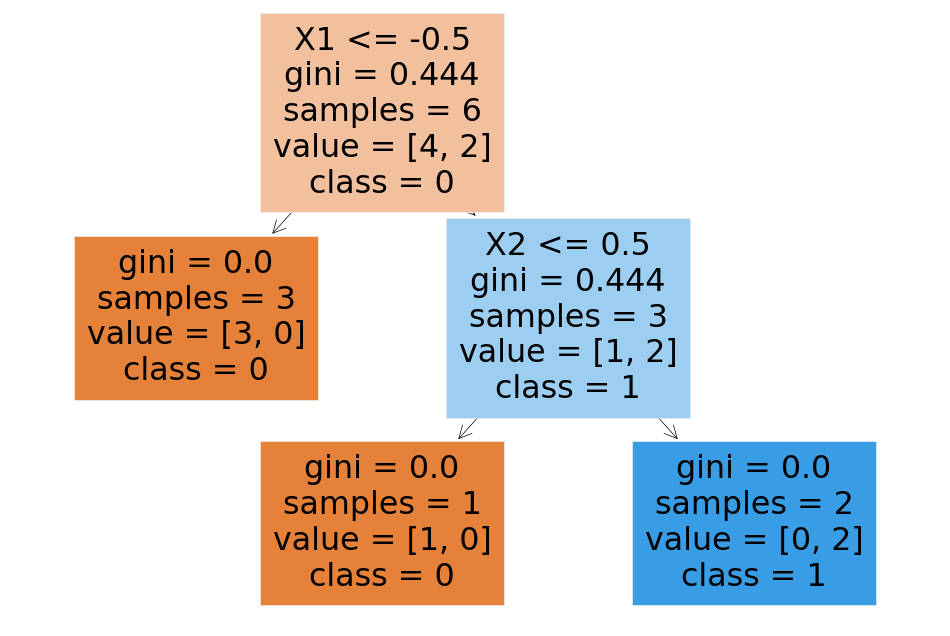

In [32]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['X1', 'X2', 'X3'], class_names=['0', '1'])
plt.show()


In [498]:


def calcular_entropia(y):
    contador = Counter(y)
    probabilidades = [frecuencia / len(y) for frecuencia in contador.values()]
    entropia = -sum(p * math.log2(p) for p in probabilidades)
    return entropia

def dividir_datos(datos, variable, umbral):
    izquierda = datos[datos[:, variable] <= umbral]
    derecha = datos[datos[:, variable] > umbral]
    return izquierda, derecha

def encontrar_mejor_division(datos):
    mejor_entropia = 1e9
    mejor_variable = None
    mejor_umbral = None
    for variable in range(1, datos.shape[1] - 1):
        valores = set(datos[:, variable])
        for umbral in valores:
            izquierda, derecha = dividir_datos(datos, variable, umbral)
            if len(izquierda) > 0 and len(derecha) > 0:
                entropia_izquierda = calcular_entropia(izquierda[:, -1])
                entropia_derecha = calcular_entropia(derecha[:, -1])
                entropia_total = (len(izquierda) * entropia_izquierda + len(derecha) * entropia_derecha) / len(datos)
                if entropia_total < mejor_entropia:
                    mejor_entropia = entropia_total
                    mejor_variable = variable
                    mejor_umbral = umbral
    return mejor_variable, mejor_umbral, mejor_entropia

def construir_arbol(datos):
    if calcular_entropia(datos[:, -1]) == 0:
        return {"clase": datos[0, -1], "ejemplos": datos[:, 0].tolist()}

    variable, umbral, entropia = encontrar_mejor_division(datos)
    if variable is None:
        contador = Counter(datos[:, -1])
        clase_predominante = contador.most_common(1)[0][0]
        return {"clase": clase_predominante, "ejemplos": datos[:, 0].tolist()}

    izquierda, derecha = dividir_datos(datos, variable, umbral)
    subarbol_izquierdo = construir_arbol(izquierda)
    subarbol_derecho = construir_arbol(derecha)

    return {
        "variable": f"X{variable}",
        "umbral": umbral,
        "entropia": entropia,
        "izquierda": subarbol_izquierdo,
        "derecha": subarbol_derecho
    }

# Datos de ejemplo
datos = np.array([
    [1, 4, 3, -1, 1],
    [2, -3, -1, -1, 0],
    [3, 3, -2, 0, 0],
    [4, 1, 4, 0, 1],
    [5, -2, 3, 1, 0],
    [6, -3, 5, 5, 0]
])

# Construir y mostrar el árbol
arbol_decision = construir_arbol(datos)
print(arbol_decision)


{'variable': 'X1', 'umbral': -2, 'entropia': 0.4591479170272448, 'izquierda': {'clase': 0, 'ejemplos': [2, 5, 6]}, 'derecha': {'variable': 'X2', 'umbral': -2, 'entropia': -0.0, 'izquierda': {'clase': 0, 'ejemplos': [3]}, 'derecha': {'clase': 1, 'ejemplos': [1, 4]}}}


In [359]:
import numpy as np

# Datos proporcionados
data = np.array([
    [1,  4,  3, -1,  1, 1],
    [2, -3, -1, -1,  0, 0],
    [3,  3, -2,  0,  0, 0],
    [4,  1,  4,  0,  1, 1],
    [5, -2,  3,  1,  0, 0],
    [6, -3,  5,  5,  0, 0]
])

# Separar las clases
classes = data[:, -1]

# Contar la frecuencia de cada clase
class_counts = np.unique(classes, return_counts=True)[1]

# Calcular la entropía
entropy = -np.sum((class_counts / class_counts.sum()) * np.log2(class_counts / class_counts.sum()))
entropy

def calculate_entropy(subset):
    """ Calculate the entropy of a given subset of data. """
    if len(subset) == 0:
        return 0
    class_counts = np.unique(subset, return_counts=True)[1]
    probabilities = class_counts / class_counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

def split_data_on_feature(data, feature_index, threshold):
    """ Split the data based on a feature and threshold. """
    subset1 = data[data[:, feature_index] <= threshold, -1]
    subset2 = data[data[:, feature_index] > threshold, -1]
    return subset1, subset2

# Ejemplo de división usando la primera característica (X1) con un umbral de 3
feature_index = 0  # X1
threshold = 3

subset1, subset2 = split_data_on_feature(data, feature_index, threshold)
entropy_subset1 = calculate_entropy(subset1)
entropy_subset2 = calculate_entropy(subset2)

# Calcular la ganancia de información
total_size = len(classes)
info_gain = entropy - (len(subset1) / total_size * entropy_subset1 + len(subset2) / total_size * entropy_subset2)
info_gain, entropy_subset1, entropy_subset2


(0.0, 0.9182958340544896, 0.9182958340544896)

In [15]:
import numpy as np

def calculate_entropy(y):
    """ Calcula la entropía de un conjunto de etiquetas. """
    class_counts = np.bincount(y)
    probabilities = class_counts / len(y)
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    return entropy

def split_dataset(X, y, feature_index, threshold):
    """ Divide el conjunto de datos basado en un umbral de una característica. """
    left_mask = X[:, feature_index] <= threshold
    right_mask = X[:, feature_index] > threshold
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

def best_split(X, y):
    """ Encuentra la mejor división calculando la ganancia de información. """
    best_gain = 0
    best_feature = None
    best_threshold = None
    current_entropy = calculate_entropy(y)

    n_features = X.shape[1]

    for feature_index in range(n_features):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_dataset(X, y, feature_index, threshold)

            if len(y_left) == 0 or len(y_right) == 0:
                continue

            # Calcular la ganancia de información
            gain = current_entropy - (len(y_left) / len(y) * calculate_entropy(y_left) + 
                                      len(y_right) / len(y) * calculate_entropy(y_right))

            if gain > best_gain:
                best_gain = gain
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

class TreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
        """
        Nodo del árbol de decisión.
        - feature_index: índice de la característica usada para dividir el nodo.
        - threshold: valor umbral para dividir.
        - left: subárbol izquierdo.
        - right: subárbol derecho.
        - value: valor en un nodo hoja.
        """
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def build_tree(X, y, depth=0, max_depth=100):
    """ Construye el árbol de decisión. """
    num_samples, num_features = X.shape

    # Si todas las etiquetas son iguales, retorna un nodo hoja
    if np.unique(y).size == 1:
        return TreeNode(value=y[0])

    # Limitar la profundidad del árbol
    if depth >= max_depth:
        return TreeNode(value=mode(y))

    # Encontrar la mejor división
    feature, threshold = best_split(X, y)

    if feature is None:
        return TreeNode(value=mode(y))

    X_left, y_left, X_right, y_right = split_dataset(X, y, feature, threshold)

    # Construir subárboles
    left_subtree = build_tree(X_left, y_left, depth+1, max_depth)
    right_subtree = build_tree(X_right, y_right, depth+1, max_depth)

    return TreeNode(feature_index=feature, threshold=threshold, left=left_subtree, right=right_subtree)

def mode(y):
    """ Retorna el valor más común en un array. """
    return np.bincount(y).argmax()

def print_tree(node, depth=0):
    """ Imprime el árbol de decisión de forma recursiva. """
    if not node:
        return

    if node.value is not None:
        print("\t" * depth + "Hoja: Clase =", node.value)
    else:
        print("\t" * depth + "Nodo: X{} <= {}".format(node.feature_index, node.threshold))
        print_tree(node.left, depth + 1)
        print_tree(node.right, depth + 1)

        
# Ejemplo de uso:
data = np.array([
    [1,  4,  3, -1,  1, 1],
    [2, -3, -1, -1,  0, 0],
    [3,  3, -2,  0,  0, 0],
    [4,  1,  4,  0,  1, 1],
    [5, -2,  3,  1,  0, 0],
    [6, -3,  5,  5,  0, 0]
])

X = data[:, :-1]  # Todas las columnas excepto la última
y = data[:, -1]   # Última columna

tree = build_tree(X, y)

print_tree(tree,1)

	Nodo: X4 <= 0
		Hoja: Clase = 0
		Hoja: Clase = 1


In [16]:
import numpy as np

class TreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None, examples=None):
        """
        Nodo del árbol de decisión.
        - feature_index: índice de la característica usada para dividir el nodo.
        - threshold: valor umbral para dividir.
        - left: subárbol izquierdo.
        - right: subárbol derecho.
        - value: valor en un nodo hoja.
        - examples: índices de los ejemplos en el nodo.
        """
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        self.examples = examples

# Funciones calculate_entropy, split_dataset, best_split y mode permanecen iguales

def build_tree(X, y, depth=0, max_depth=100, example_indices=None):
    """ Construye el árbol de decisión. """
    if example_indices is None:
        example_indices = np.arange(X.shape[0])

    if np.unique(y[example_indices]).size == 1 or depth >= max_depth:
        return TreeNode(value=mode(y[example_indices]), examples=example_indices)

    feature, threshold = best_split(X[example_indices], y[example_indices])

    if feature is None:
        return TreeNode(value=mode(y[example_indices]), examples=example_indices)

    left_indices, right_indices = split_dataset_indices(X[example_indices], y[example_indices], feature, threshold)
    left_subtree = build_tree(X, y, depth + 1, max_depth, example_indices[left_indices])
    right_subtree = build_tree(X, y, depth + 1, max_depth, example_indices[right_indices])

    return TreeNode(feature_index=feature, threshold=threshold, left=left_subtree, right=right_subtree, examples=example_indices)

def split_dataset_indices(X, y, feature_index, threshold):
    """ Devuelve los índices de los subconjuntos divididos. """
    left_mask = X[:, feature_index] <= threshold
    right_mask = X[:, feature_index] > threshold
    return np.where(left_mask)[0], np.where(right_mask)[0]

def print_tree(node, depth=0):
    """ Imprime el árbol de decisión de forma recursiva. """
    if not node:
        return

    indent = "\t" * depth
    if node.value is not None:
        print(f"{indent}Hoja: Clase = {node.value}, Ejemplos = {node.examples}")
    else:
        print(f"{indent}Nodo: X{node.feature_index} <= {node.threshold}, Ejemplos = {node.examples}")
        print_tree(node.left, depth + 1)
        print_tree(node.right, depth + 1)

# Ejemplo de uso
        
# Ejemplo de uso:
data = np.array([
    [1,  4,  3, -1,  1, 1],
    [2, -3, -1, -1,  0, 0],
    [3,  3, -2,  0,  0, 0],
    [4,  1,  4,  0,  1, 1],
    [5, -2,  3,  1,  0, 0],
    [6, -3,  5,  5,  0, 0]
])

X = data[:, :-1]
y = data[:, -1]

tree = build_tree(X, y)

print("Árbol de Decisión:")
print_tree(tree)


Árbol de Decisión:
Nodo: X4 <= 0, Ejemplos = [0 1 2 3 4 5]
	Hoja: Clase = 0, Ejemplos = [1 2 4 5]
	Hoja: Clase = 1, Ejemplos = [0 3]


In [6]:
# definimos nuestro punto para la prediccion
point=np.array([0,0,0])

**a)** Computar la distancia entre cada observación y el punto de test.

Usamos la distancia euclidania para este calculo


In [7]:
# Compute Euclidean distance for each observation
distances = np.sqrt(np.sum((dataset[['X1', 'X2', 'X3']] - point) ** 2, axis=1))
# Create a DataFrame to display the distances
distance_df = pd.DataFrame({
    'Observacion': dataset.apply(lambda row: f'({row["X1"]}, {row["X2"]}, {row["X3"]})', axis=1),
    'Etiqueta_Observacion': dataset['Y'],
    'Punto': dataset.apply(lambda row: f'({point[0]}, {point[1]}, {point[2]})', axis=1),
    'Distancia_Euclidiana': distances
})

# visualizarlo de manera vonita
display(distance_df)

,Observacion,Etiqueta_Observacion,Punto,Distancia_Euclidiana
0,"(0, 3, 2)",1,"(0, 0, 0)",3.605551
1,"(3, 0, 3)",0,"(0, 0, 0)",4.242641
2,"(0, 3, -1)",0,"(0, 0, 0)",3.162278
3,"(3, 0, 0)",1,"(0, 0, 0)",3.000000
4,"(1, 2, 1)",1,"(0, 0, 0)",2.449490
5,"(2, 1, 0)",0,"(0, 0, 0)",2.236068


**Nota:** este ejercicio debe hacerse sin utilizar ninguna función de scikit-learn. No es necesario
estandarizar las variables.

In [17]:
#Nota: este ejercicio debe hacerse sin utilizar ninguna función de scikit-learn. No es necesario estandarizar las variables
# Creamos nuestra propia función KNeighborsClassifier para no usar scikit-learn

def knn_classifier(X_train, y_train, X_test, K):
    """
    Clasificación KNN personalizada para un valor de K dado.
    
    Args:
    X_train (numpy.ndarray): Conjunto de entrenamiento (características).
    y_train (numpy.ndarray): Etiquetas del conjunto de entrenamiento.
    X_test (numpy.ndarray): Puntos de prueba (características) a clasificar.
    K (int): Número de vecinos cercanos a considerar.
    
    Returns:
    numpy.ndarray: Predicciones para los puntos de prueba.
    """
    predictions = []
    
    for test_point in X_test:
        # Calcula las distancias euclidianas entre el punto de prueba y todos los puntos de entrenamiento
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        
        # Encuentra los índices de los K vecinos más cercanos
        nearest_indices = np.argsort(distances)[:K]
        # Obtiene las etiquetas de los K vecinos más cercanos
        nearest_labels = y_train[nearest_indices]
        
        # Realiza una predicción basada en la mayoría de votos de los vecinos cercanos
        prediction = np.bincount(nearest_labels).argmax()
        predictions.append(prediction)
    
    return np.array(predictions)


In [26]:
#comparamos la salida de scikit-learn para comprobar que nuestra funcion esta bien
point_test=np.array([[0,0,0]]) 
X = dataset[['X1', 'X2', 'X3']]
y = dataset['Y']

# Valores de K para probar
k_values = [1,2,3,4,5]

# Almacenar resultados de precisión
accuracy_custom_knn = []
accuracy_sklearn_knn = []

# Evaluar diferentes valores de K
for K in k_values:
    # Usar nuestra función personalizada de KNN
    predictions_custom_knn = knn_classifier(X, y, point_test, K)
    accuracy_custom_knn.append(predictions_custom_knn)
    
    # Usar la implementación de scikit-learn de KNN
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X, y)
    predictions_sklearn_knn = knn.predict(point_test)
    accuracy_sklearn_knn.append(predictions_sklearn_knn)

accuracy_custom_knn=np.array(accuracy_custom_knn)
accuracy_sklearn_knn=np.array(accuracy_sklearn_knn)
valores_distintos = np.setxor1d(accuracy_custom_knn, accuracy_sklearn_knn)
print("KNN custom",accuracy_custom_knn.T)
print("KNN sklearn",accuracy_custom_knn.T)
print("Son iguales: ",valores_distintos)

KNN custom [[0 0 1 0 1]]
KNN sklearn [[0 0 1 0 1]]
Son iguales:  []


Lo que demuestra es que tiene un comportamiento similar por lo que podemos usarla

**b)** ¿Cuál es la predicción para K=1? ¿Por qué?

Como podemos observar se etiqueta como 0. Puesto que en la tabla que antes generamos se pude observar el punto mas cercano al punto test es el (2,1,0) que está etiquetado como 0

In [28]:
prediction = knn_classifier(X,y,point_test,1)
# comparamos la salida de scikit-learn para comprobar que nuestra funcion esta bien
print(f'Prediction for K=1: {prediction[0]}')

Prediction for K=1: 0


**c)** ¿Cuál es la predicción para K=3? ¿Por qué?

Como podemos observar se etiqueta como 1. Puesto que en la tabla que antes generamos se pude observar los 3 punto mas cercano al punto test son el (2,1,0) que está etiquetado como 0 (1,2,1) que está etiquetado como 1 y el (3,0,0) que está etiquetado como 1, por lo que haber 2 vecinos etiquetados como 1 etiqueta el punto como 1

In [29]:
prediction = knn_classifier(X,y,point_test,3)

print(f'Prediction for K=1: {prediction[0]}')


Prediction for K=1: 1


### Ejercicio 2

Dado el problema de clasificación [Blood Transfusion Service Center](https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center):


**a)** Analiza las características del conjunto de datos: número y tipo de variables de entrada y
salida, número de instancias, número de clases y distribución de las mismas, correlación
entre las variables, valores perdidos, etc.

## Leemos el fichero de datos

In [53]:
DATASET_BLOOD='./data/blood+transfusion+service+center/transfusion.data'
# Leer el archivo de datos y obtener la primera fila como nombres de columnas
data = pd.read_csv(DATASET_BLOOD)
NAME_BLOOD = data.columns.tolist()

NAME_BLOOD=["Reciente","Frecuencia","Cantidad_Sangre","Tiempo","Donacion_marzo"]
if os.path.exists(DATASET_BLOOD):
    dataset = pd.read_csv(DATASET_BLOOD, 
                          delimiter=DATASET_DELIMITER,
                          skiprows=1,
                          header=None,
                          names = NAME_BLOOD)
else:
    dataset = d.DataFrame(np.array(
    [[0, 3, 2, 1], 
    [3, 0, 3, 0], 
    [0, 3, -1, 0], 
    [3, 0, 0, 1], 
    [1, 2, 1, 1], 
    [2, 1, 0, 0]]), columns=['X1', 'X2', 'X3', 'Y'])
dataset

,Reciente,Frecuencia,Cantidad_Sangre,Tiempo,Donacion_marzo
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0




Cada columna de este DataFrame representa la siguiente información:

- Reciente (Recency (months)): el número de meses que han pasado desde la última donación.
- Frecuencia (Frequency (times)): el número total de donaciones de esta persona.
- Cantidad_Sangre (Monetary (c.c. blood)): cantidad total de sangre donada en centímetros cúbicos (c.c.).
- Tiempo (Time (months)): el número de meses desde la primera donación de esta persona.
- Donacion_marzo (whether he/she donated blood in March 2007): la variable a predecir, que nos indica si esta persona donó o no en Marzo de 2007 (1 significa que donó mientras que 0 indica que no donó).



## Visualizamos los datos

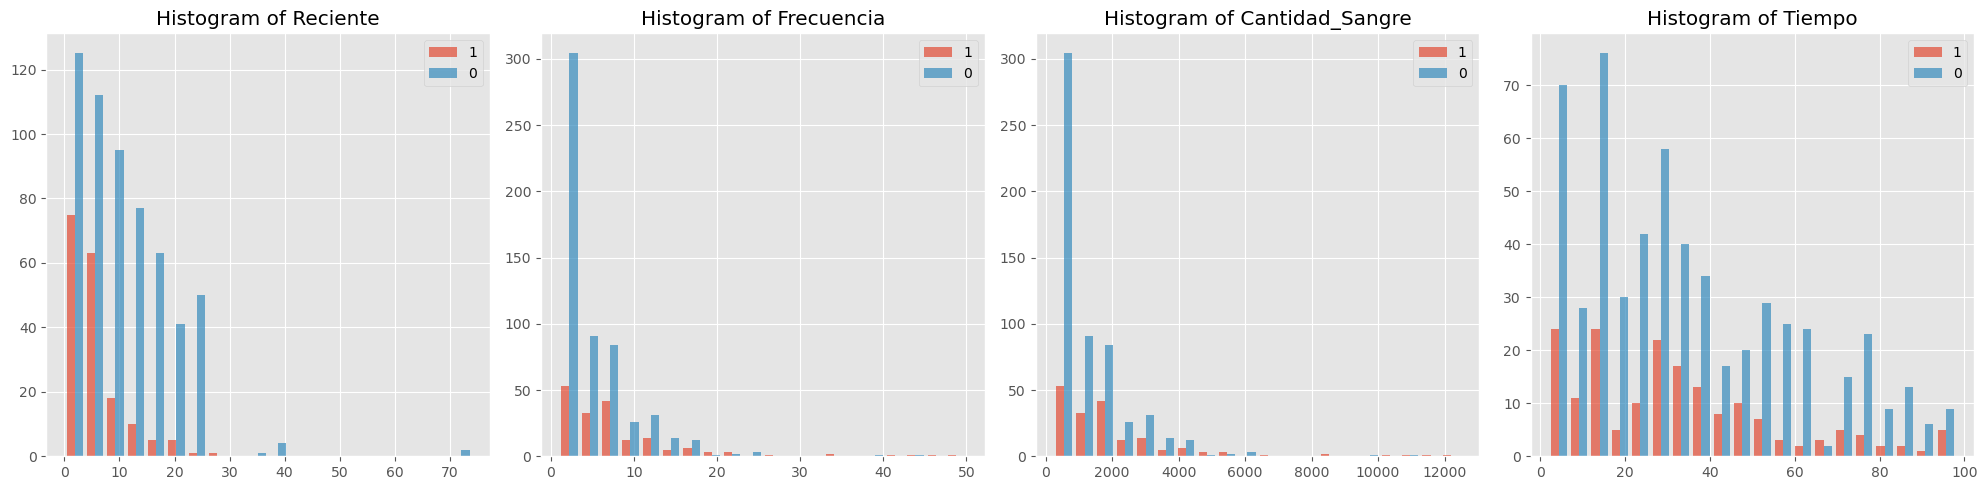

In [64]:
# Excluir la columna de la etiqueta
columns = dataset.columns[:-1]

# Crear una cuadrícula de subtramas 2x4 para histogramas y gráficos de dispersión
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Visualizar histogramas para todas las columnas
for i, column in enumerate(columns):
    axs[i].hist([dataset[dataset['Donacion_marzo'] == 1][column], 
                    dataset[dataset['Donacion_marzo'] == 0][column]], 
                   label=['1', '0'], bins=20, alpha=0.7)
    axs[i].set_title(f'Histogram of {column}')
    axs[i].legend(loc='upper right')
# Ajustar el diseño
plt.tight_layout()
plt.show()



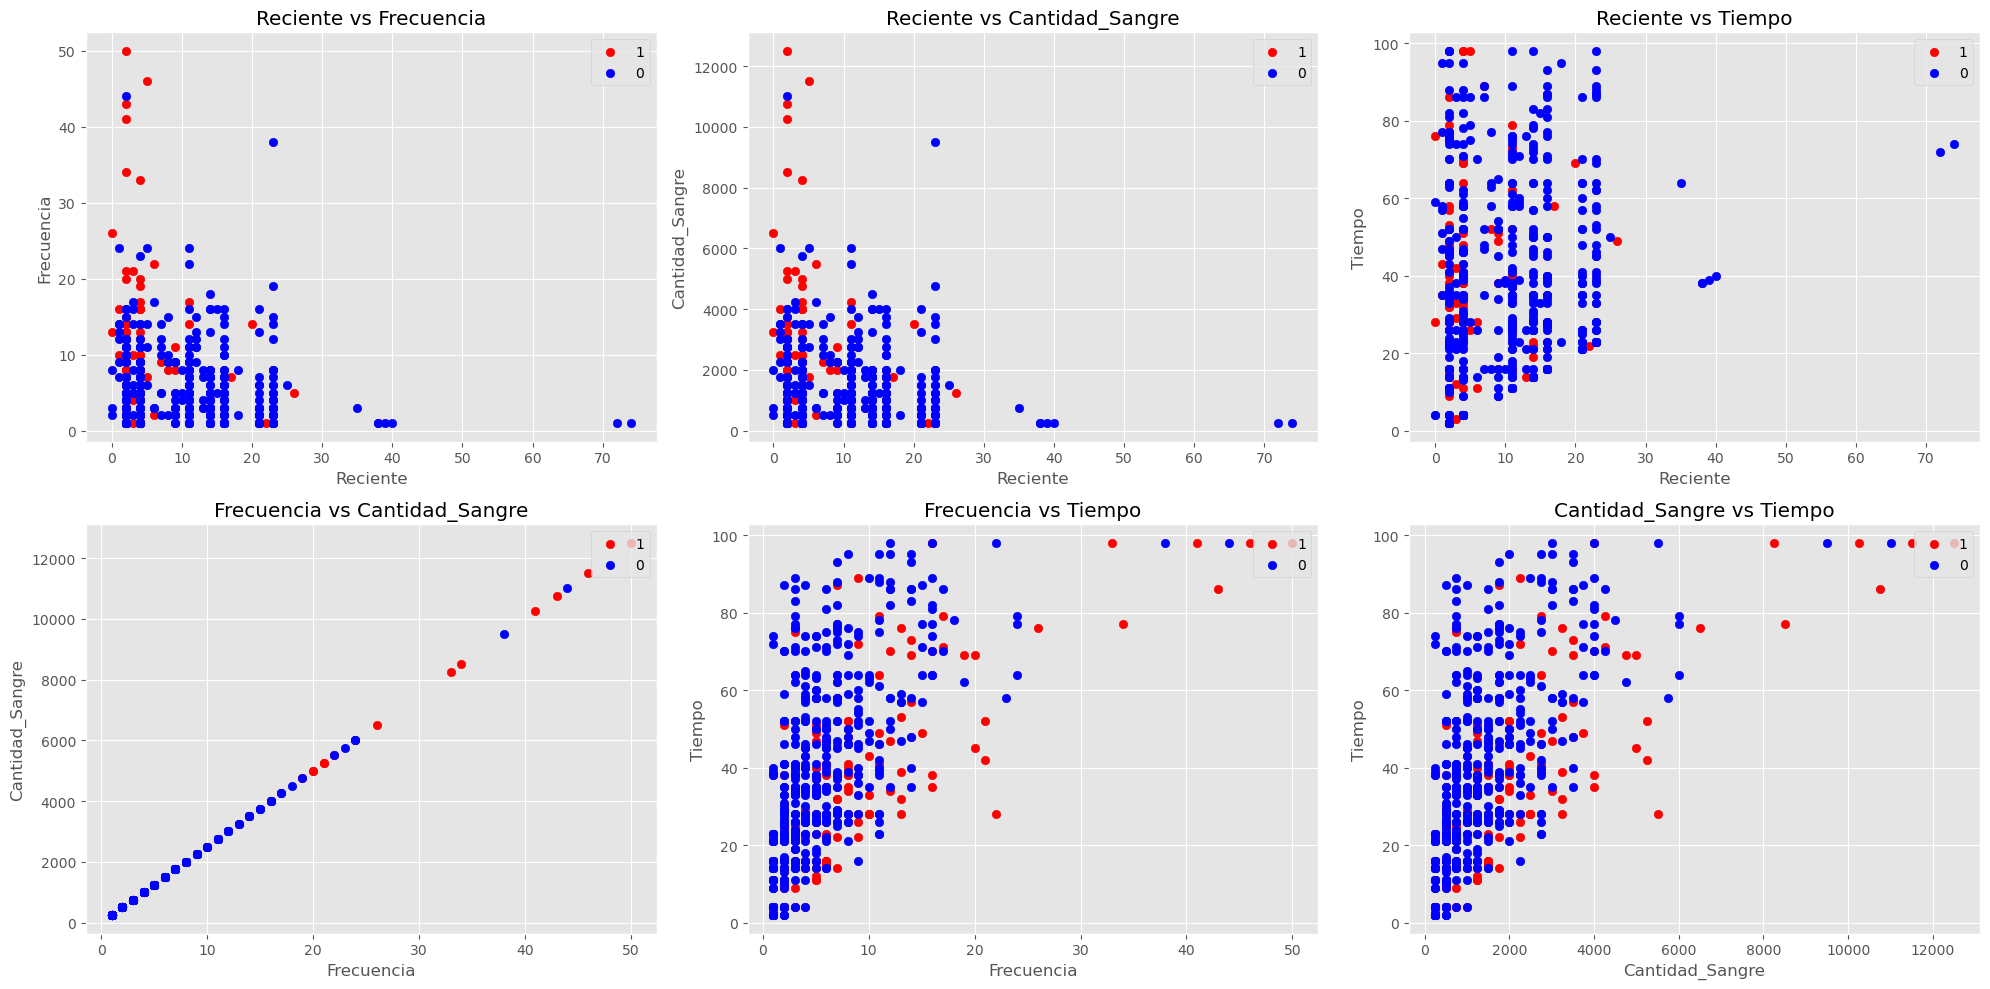

In [67]:
# Crear todas las combinaciones posibles de pares de variables
combinations = list(itertools.combinations(columns, 2))

# Calcular el número de filas necesario para acomodar todas las combinaciones
num_combinations = len(combinations)
num_rows = num_combinations // 3 + (num_combinations % 3 > 0)

# Crear una cuadrícula de subtramas con un número suficiente de filas para todas las combinaciones
fig, axs = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))  # Ajustar el tamaño de figura según sea necesario

# Visualizar gráficos de dispersión para todas las combinaciones
for j, (var1, var2) in enumerate(combinations):
    row = j // 3
    col = j % 3
    axs[row, col].scatter(dataset[dataset['Donacion_marzo'] == 1][var1], 
                          dataset[dataset['Donacion_marzo'] == 1][var2], 
                          c='red', label='1')
    axs[row, col].scatter(dataset[dataset['Donacion_marzo'] == 0][var1], 
                          dataset[dataset['Donacion_marzo'] == 0][var2], 
                          c='blue', label='0')
    axs[row, col].set_title(f'{var1} vs {var2}')
    axs[row, col].set_xlabel(var1)
    axs[row, col].set_ylabel(var2)
    axs[row, col].legend(loc='upper right')

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar la figura
plt.show()

 **Nota**

- **Desequilibrio de Clases**: La primera fila de histogramas muestra un claro desequilibrio de clases entre aquellos que donaron sangre en marzo de 2007 (etiqueta '1') y aquellos que no lo hicieron (etiqueta '0'). Esto puede afectar el rendimiento del modelo de aprendizaje automático, ya que puede sesgarse hacia la clase más frecuente. Se recomienda aplicar técnicas de balanceo de clases como sobremuestreo, submuestreo o generación de datos sintéticos para manejar este desequilibrio.

- **Relación entre 'Frequency' y 'Monetary'**: La correlación directa entre 'Frequency' y 'Monetary' es evidente en el gráfico de dispersión de la esquina inferior derecha, lo que indica una relación lineal casi perfecta. Esto es coherente con la naturaleza de las variables, dado que 'Monetary' es probablemente un múltiplo de 'Frequency' (cada donación tiene un volumen fijo de sangre). Esto sugiere que una de las dos variables podría ser redundante para el modelado predictivo, y se podría considerar eliminar una para simplificar el modelo sin perder información significativa.

- **Posible correlación entre 'Time' y otras variables**: Los gráficos de dispersión 'Reciente vs Tiempo' y 'Frecuencia vs Tiempo' no muestran una relación lineal clara, pero sí sugieren algún tipo de relación. Por ejemplo, en 'Reciente vs Tiempo', hay una tendencia de que aquellos con valores más bajos de 'Reciente' tienen una distribución más amplia en 'Tiempo', lo que podría sugerir que los donantes nuevos tienden a tener un historial más corto de donaciones. Sin embargo, esta observación necesita ser investigada más a fondo, posiblemente con análisis estadísticos para establecer la fuerza y la significancia de la correlación.

- **Dispersión de los datos**: Hay una dispersión considerable en los datos, especialmente en los gráficos de dispersión 'Reciente vs Frecuencia' y 'Reciente vs Cantidad_Sangre', lo que podría indicar que la variable 'Reciente' tiene una relación menos directa con la frecuencia y la cantidad de donaciones en comparación con la relación entre 'Frecuencia' y 'Cantidad_Sangre'.


**PCA:** como observalos la relación entre 'Frequency' y 'Monetary' se podría hacer una reducción dimensional para mejorar el funconamiento de KNN 

**b)** Una de las clases que implementa el algoritmo KNN en scikit-learn sklearn.neighbors.KNeighborsClassifier. Revisa los parámetros y métodos que tiene.

El [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) en scikit-learn es un clasificador que implementa la votación de los k-vecinos más cercanos. Aquí están sus parámetros y métodos basados en la documentación oficial de scikit-learn:

Parámetros:

- `n_neighbors` (int, por defecto=5): Número de vecinos a utilizar para consultas de kneighbors.
- `weights` ({'uniform', 'distance'} o callable, por defecto='uniform'): Función de peso utilizada en la predicción.
- `algorithm` ({'auto', 'ball_tree', 'kd_tree', 'brute'}, por defecto='auto'): Algoritmo utilizado para calcular los vecinos más cercanos.
- `leaf_size` (int, por defecto=30): Tamaño de hoja pasado a BallTree o KDTree.
- `p` (float, por defecto=2): Parámetro de potencia para la métrica de Minkowski.
- `metric` (str o callable, por defecto='minkowski'): La métrica de distancia a utilizar para el árbol.
- `metric_params` (dict, por defecto=None): Argumentos adicionales de palabras clave para la función métrica.
- `n_jobs` (int, por defecto=None): El número de trabajos paralelos a ejecutar para la búsqueda de vecinos.

Métodos:

- `fit`(X, y): Ajustar el clasificador a partir del conjunto de datos de entrenamiento.
- `get_metadata_routing`(): Obtener el enrutamiento de metadatos del objeto.
- `get_params`([deep]): Obtener los parámetros para este estimador.
- `kneighbors`([X, n_neighbors, return_distance]): Encontrar los K-vecinos de un punto.
- `kneighbors_graph`([X, n_neighbors, mode]): Calcular el grafo (ponderado) de k-Vecinos para los puntos en X.
- `predict`(X): Predecir las etiquetas de clase para los datos proporcionados.
- `predict_proba`(X): Devolver las estimaciones de probabilidad para los datos de prueba X.
- `score`(X, y[, sample_weight]): Devolver la precisión media en los datos de prueba y etiquetas proporcionados.
- `set_params`(**params): Establecer los parámetros de este estimador.
- `set_score_request`(*[, sample_weight]): Solicitar metadatos pasados al método `score`.


n_neighbors: 3, weights: uniform, Accuracy: 0.79
n_neighbors: 3, weights: distance, Accuracy: 0.79
n_neighbors: 5, weights: uniform, Accuracy: 0.80
n_neighbors: 5, weights: distance, Accuracy: 0.80
n_neighbors: 10, weights: uniform, Accuracy: 0.80
n_neighbors: 10, weights: distance, Accuracy: 0.80


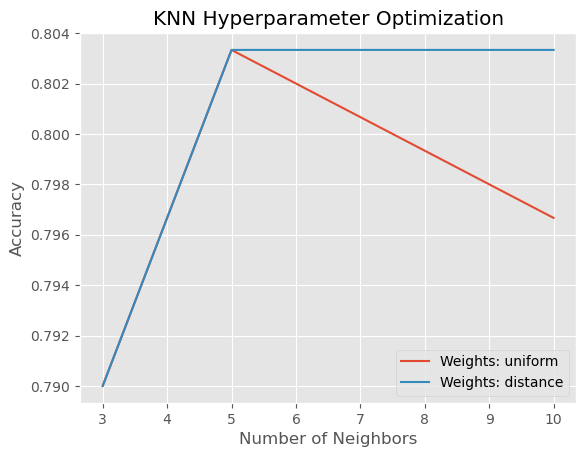

In [74]:
from sklearn.datasets import make_classification
# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameters to test
n_neighbors_options = [3, 5, 10]
weights_options = ['uniform', 'distance']

# Store the results
results = []

# Loop over hyperparameters
for n_neighbors in n_neighbors_options:
    for weights in weights_options:
        # Create and fit the model
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        knn.fit(X_train, y_train)
        
        # Make predictions
        y_pred = knn.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results
        results.append((n_neighbors, weights, accuracy))

# Print results
for n_neighbors, weights, accuracy in results:
    print(f"n_neighbors: {n_neighbors}, weights: {weights}, Accuracy: {accuracy:.2f}")

# Plot results
fig, ax = plt.subplots()
for weights in weights_options:
    ax.plot(n_neighbors_options, [acc for n, w, acc in results if w == weights], label=f'Weights: {weights}')

ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('Accuracy')
ax.set_title('KNN Hyperparameter Optimization')
ax.legend()
plt.show()

**c)** División de los datos en entrenamiento (80%) y test (20%):

<span style="color:red">**MUY IMPORTANTE:**</span> Vamos a establecer una semilla con un valor predefinido inmediatamente antes de ejecutar cualquier operación con un componente aleatorio. Así aseguramos que nuestros resultados sean repetibles.

Esto es, vamos a poner `np.random.seed(SEED_VALUE)` antes de:
 - `fit()`
 - `predict()`
 
En aquellas funciones que lo admitan, sustituiremos el comando np.random.seed(SEED_VALUE) por el argumento `random_state=SEED_VALUE`. Por ejemplo, para la división de datos entre entrenamiento y test con `train_test_split`.

In [75]:
# tenemos mas ejemplos de una categoria que en otra si queremos hacer una experimentación para el conjunto de test 
# con stratify mantenga el mismo poncentaje de cadad clase  en el test y en el train en este 
# caso es para que train si hay 2 categorias mantenga la proporcion de estas en train y test decir que si en el total 
# tenemos 60% 1 y 40% 2 se intenta man tener el porcentaje de dataos 
dataset_train, dataset_test = train_test_split(dataset,
                            test_size=0.2, random_state=SEED_VALUE,
                                               stratify=dataset["Donacion_marzo"])
dataset_test

,Reciente,Frecuencia,Cantidad_Sangre,Tiempo,Donacion_marzo
309,16,3,750,19,0
711,23,6,1500,45,0
343,11,1,250,11,0
462,21,1,250,21,1
646,14,2,500,14,0
...,...,...,...,...,...
315,4,2,500,29,0
473,14,3,750,83,0
661,16,2,500,16,0
362,4,3,750,71,0


## Gestión de valores faltantes

En este caso, nuestro dataset no tiene valores faltantes.
Sin embargo, la sustitución de las variables predictoras por la media se llevaría a cabo de la siguiente manera.

In [76]:
imp = SimpleImputer(missing_values=np.nan, fill_value='mean')
imp = imp.fit(dataset_train)  # La media la calculamos SÓLO a partir del conjunto de train

# Los valores van a ser los mismos que antes, pues no tenemos datos faltantes
dataset_train_prep = imp.transform(dataset_train)
dataset_test_prep = imp.transform(dataset_test)

dataset_test_prep

array([[1.600e+01, 3.000e+00, 7.500e+02, 1.900e+01, 0.000e+00],
       [2.300e+01, 6.000e+00, 1.500e+03, 4.500e+01, 0.000e+00],
       [1.100e+01, 1.000e+00, 2.500e+02, 1.100e+01, 0.000e+00],
       [2.100e+01, 1.000e+00, 2.500e+02, 2.100e+01, 1.000e+00],
       [1.400e+01, 2.000e+00, 5.000e+02, 1.400e+01, 0.000e+00],
       [2.100e+01, 3.000e+00, 7.500e+02, 4.000e+01, 0.000e+00],
       [2.300e+01, 1.000e+00, 2.500e+02, 2.300e+01, 0.000e+00],
       [4.000e+00, 6.000e+00, 1.500e+03, 3.500e+01, 1.000e+00],
       [2.000e+00, 2.000e+00, 5.000e+02, 4.000e+00, 1.000e+00],
       [9.000e+00, 2.000e+00, 5.000e+02, 1.100e+01, 0.000e+00],
       [4.000e+00, 8.000e+00, 2.000e+03, 2.100e+01, 0.000e+00],
       [1.400e+01, 2.000e+00, 5.000e+02, 1.400e+01, 1.000e+00],
       [9.000e+00, 9.000e+00, 2.250e+03, 1.600e+01, 0.000e+00],
       [4.000e+00, 7.000e+00, 1.750e+03, 3.200e+01, 1.000e+00],
       [4.000e+00, 9.000e+00, 2.250e+03, 2.600e+01, 1.000e+00],
       [1.100e+01, 4.000e+00, 1.000e+03,

`SimpleImputer` ha convertido nuestros valores a un array NumPy, por lo que sería bueno que los volviéramos a convertir en formato dataframe.

In [77]:
dataset_train = pd.DataFrame(dataset_train_prep,
                             columns=dataset_train.columns,
                             index=dataset_train.index)
dataset_test = pd.DataFrame(dataset_test_prep,
                            columns=dataset_test.columns,
                            index=dataset_test.index)

dataset_test

,Reciente,Frecuencia,Cantidad_Sangre,Tiempo,Donacion_marzo
309,16.0,3.0,750.0,19.0,0.0
711,23.0,6.0,1500.0,45.0,0.0
343,11.0,1.0,250.0,11.0,0.0
462,21.0,1.0,250.0,21.0,1.0
646,14.0,2.0,500.0,14.0,0.0
...,...,...,...,...,...
315,4.0,2.0,500.0,29.0,0.0
473,14.0,3.0,750.0,83.0,0.0
661,16.0,2.0,500.0,16.0,0.0
362,4.0,3.0,750.0,71.0,0.0


## Separación de variables predictoras y dependientes

In [83]:
dataset_train_X = dataset_train.loc[:, NAME_BLOOD[:-1]].astype(float)
dataset_train_Y = dataset_train.loc[:, NAME_BLOOD[-1]]
dataset_train_X


,Reciente,Frecuencia,Cantidad_Sangre,Tiempo
619,4.0,1.0,250.0,4.0
357,14.0,3.0,750.0,26.0
405,14.0,3.0,750.0,41.0
700,16.0,3.0,750.0,35.0
479,23.0,1.0,250.0,23.0
...,...,...,...,...
63,4.0,5.0,1250.0,16.0
569,2.0,6.0,1500.0,45.0
83,2.0,4.0,1000.0,16.0
37,4.0,6.0,1500.0,16.0


In [84]:
dataset_test_X = dataset_test.loc[:, NAME_BLOOD[:-1]].astype(float)
dataset_test_Y = dataset_test.loc[:, NAME_BLOOD[-1]]

dataset_test_X

,Reciente,Frecuencia,Cantidad_Sangre,Tiempo
309,16.0,3.0,750.0,19.0
711,23.0,6.0,1500.0,45.0
343,11.0,1.0,250.0,11.0
462,21.0,1.0,250.0,21.0
646,14.0,2.0,500.0,14.0
...,...,...,...,...
315,4.0,2.0,500.0,29.0
473,14.0,3.0,750.0,83.0
661,16.0,2.0,500.0,16.0
362,4.0,3.0,750.0,71.0


## Estandarización de los datos

Esto hay que hacerlo **DESPUÉS** de dividir en conjuntos de entrenamiento y test.

Además, como es un problema de clasificación, **NO** estandarizaremos la variable dependiente.

In [79]:
scaler = StandardScaler()

scaler.fit(dataset_train_X)

dataset_train_X_scaled = scaler.transform(dataset_train_X)
dataset_test_X_scaled = scaler.transform(dataset_test_X)

dataset_test_X_scaled

array([[ 8.22450908e-01, -4.47487686e-01, -4.47487686e-01,
        -6.42119939e-01],
       [ 1.70930807e+00,  6.15756676e-02,  6.15756676e-02,
         4.09236507e-01],
       [ 1.88981507e-01, -7.86863255e-01, -7.86863255e-01,
        -9.65614230e-01],
       [ 1.45592031e+00, -7.86863255e-01, -7.86863255e-01,
        -5.61246366e-01],
       [ 5.69063148e-01, -6.17175470e-01, -6.17175470e-01,
        -8.44303871e-01],
       [ 1.45592031e+00, -4.47487686e-01, -4.47487686e-01,
         2.07052575e-01],
       [ 1.70930807e+00, -7.86863255e-01, -7.86863255e-01,
        -4.80372793e-01],
       [-6.97875655e-01,  6.15756676e-02,  6.15756676e-02,
         4.86864317e-03],
       [-9.51263415e-01, -6.17175470e-01, -6.17175470e-01,
        -1.24867173e+00],
       [-6.44062535e-02, -6.17175470e-01, -6.17175470e-01,
        -9.65614230e-01],
       [-6.97875655e-01,  4.00951237e-01,  4.00951237e-01,
        -5.61246366e-01],
       [ 5.69063148e-01, -6.17175470e-01, -6.17175470e-01,
      

Estos son los valores con los que se ha estandarizado.

In [81]:
print("mean {}: {}  |  std {}: {}".format(NAME_BLOOD[:-1],scaler.mean_, NAME_BLOOD[:-1],scaler.scale_))

mean ['Reciente', 'Frecuencia', 'Cantidad_Sangre', 'Tiempo']: [   9.5083612     5.63712375 1409.28093645   34.87959866]  |  std ['Reciente', 'Frecuencia', 'Cantidad_Sangre', 'Tiempo']: [   7.89304107    5.89317612 1473.29403119   24.72995729]


## Empezamos con la experimentación de KNN

Hemos visualizado y preprocesado los datos. Vamos a empezar a trabajar con nuestro predictor.

## Definimos un rango de hiperparámetros para realizar las pruebas

In [90]:

hyperparameters = {
    'n_neighbors': range(1, 2, 1),
    'weights': ['uniform', 'distance'],  # 'callable' no es un valor literal válido, se debe reemplazar con una función concreta si se desea usar.
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1, 50),  # Por ejemplo, valores entre 1 y 50. El valor óptimo puede variar dependiendo del tamaño del conjunto de datos.
    'p': [1, 2],  # 1 corresponde a la distancia de Manhattan y 2 a la distancia euclidiana.
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Puedes agregar más métricas compatibles con tu conjunto de datos.
    # 'metric_params': None,  # Este es un diccionario de parámetros adicionales para la función métrica y su estructura dependerá de la métrica específica que estés utilizando.
    'n_jobs': [-1]  # Utilizar -1 para usar todos los procesadores disponibles y acelerar la búsqueda.
}
# hay que llegar en los extremos las graficas de aqui pued ser minimo local y hay que exporara un poco mas

## Comenzamos las pruebas con 5-CV

In [ ]:
k_neigh = KNeighborsClassifier()
modelCV = GridSearchCV(k_neigh,
                       hyperparameters,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

## Resultados obtenidos en 5-CV

Puede verse el ranking de los mejores

In [ ]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_weights', 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]

Los mejores hiperparámetros en validación serían los siguientes (aunque no siempre conviene quedarse con los mejores):

In [ ]:
cv_results_best = cv_results[cv_results['rank_test_score'] == 1]
cv_results_best.loc[:, ['param_weights', 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]

## Gráfica de entrenamiento

In [ ]:
# separamos los pesos basados en cada 
cv_results_uniform = cv_results.loc[cv_results['param_weights'] == "uniform"]
cv_results_distance = cv_results.loc[cv_results['param_weights'] == "distance"]

# eje x xantidad de vecinos y en el y cuanto es el errror
plt.title("Error de validacion")
plt.errorbar(cv_results_uniform['param_n_neighbors'],1 - cv_results_uniform['mean_test_score'], cv_results_uniform['std_test_score'], label='uniform', capsize=3)  # 1 - [] para imprimir el error
plt.errorbar(cv_results_distance['param_n_neighbors'],1 - cv_results_distance['mean_test_score'], cv_results_distance['std_test_score'], label='distance', capsize=3)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Resultados obtenidos en 5-CV
cv_results = pd.DataFrame(modelCV.cv_results_)
# Guardar los resultados completos en un archivo CSV
cv_results.to_csv('cv_results.csv', index=False)

# Filtrar y guardar los mejores resultados
cv_results_best = cv_results[cv_results['rank_test_score'] == 1]
cv_results_best.to_csv('cv_results_best.csv', index=False)

# Separar los resultados por tipo de peso y guardarlos
cv_results_uniform = cv_results[cv_results['param_weights'] == "uniform"]
cv_results_distance = cv_results[cv_results['param_weights'] == "distance"]
cv_results_uniform.to_csv('cv_results_uniform.csv', index=False)
cv_results_distance.to_csv('cv_results_distance.csv', index=False)


## Creación de un modelo con los mejores hiperparámetros

"Entrenamos" un modelo con el menor error de validación cruzada (`n_neighbors = 4`, `weights = 'uniform'`) y con todo el conjunto de entrenamiento.

In [18]:
model = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform', algorithm='brute')

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
model.fit(dataset_train_X_scaled, dataset_train_Y)

KNeighborsClassifier(algorithm='brute', n_neighbors=4)

## Evaluación del modelo en el conjunto de test

In [19]:
np.random.seed(SEED_VALUE)
Z = model.predict(dataset_test_X_scaled)

In [20]:
accuracy_test = accuracy_score(dataset_test_Y, Z)
print("Accuracy en test: {}  |  Error en test: {}".format(accuracy_test, 1-accuracy_test))

Accuracy en test: 0.75  |  Error en test: 0.25


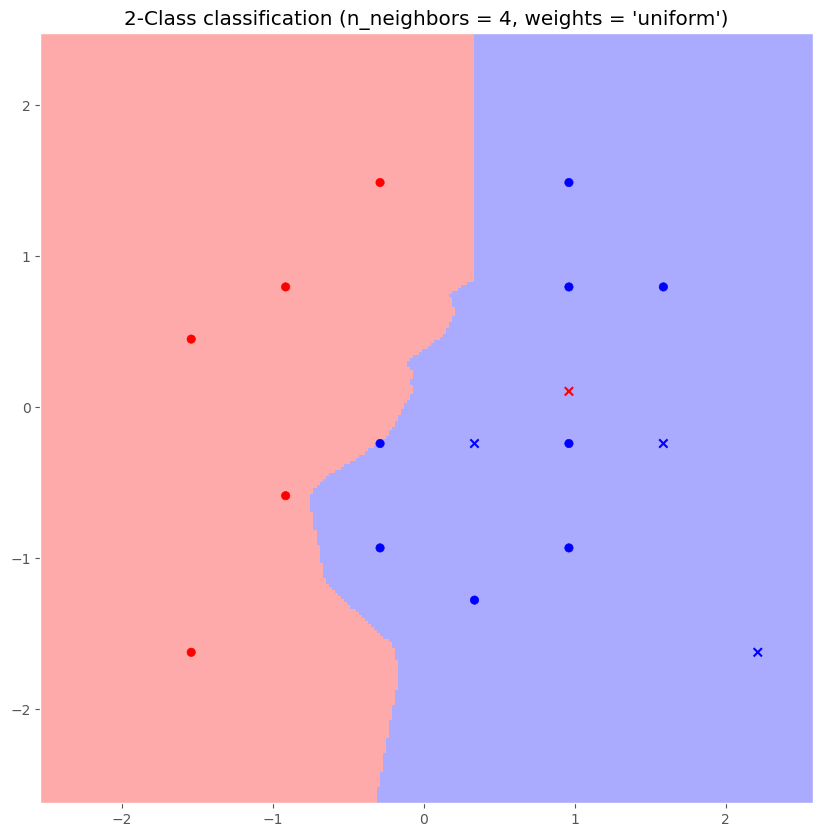

In [21]:
# Todo esto es simplemente para crear una gráfica. No es necesario prestarle demasiada atención

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = matplotlib.colors.ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = matplotlib.colors.ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min = dataset_train_X_scaled[:, 0].min() - 1  # Le sumo y resto 1 para poder ir un poco más allá de los ejemplos y verlo mejor
x_max = dataset_train_X_scaled[:, 0].max() + 1
y_min = dataset_train_X_scaled[:, 1].min() - 1
y_max = dataset_train_X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

np.random.seed(SEED_VALUE)
dense_Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
dense_Z = dense_Z.reshape(xx.shape)
plt.figure(figsize=[10, 10])
plt.pcolormesh(xx, yy, dense_Z, cmap=cmap_light)

# Plot the training and test points
plt.scatter(dataset_train_X_scaled[:, 0], 
            dataset_train_X_scaled[:, 1], 
            c=dataset_train_Y, cmap=cmap_bold, marker="o")
plt.scatter(dataset_test_X_scaled[:, 0], 
            dataset_test_X_scaled[:, 1], 
            c=dataset_test_Y, cmap=cmap_bold, marker="x")
plt.axis('scaled')  # Para que los ejes estén en la misma escala
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (n_neighbors = 4, weights = 'uniform')")

plt.show()

## Verificación de nuestros hiperparámetros

Esto no se haría **JAMÁS** en una situación real.
Pero como este es un ejemplo para aprender, vamos a ver cómo de lejos nos hemos quedado de los hiperparámetros "ideales".

Hacemos un Grid Search utilizando el conjunto de entrenamiento al completo (80% de los datos) y nuestro conjunto de validación va a ser el conjunto de test (20% de los datos).

In [22]:
# Hacemos un Grid Search sin Cross Validation, únicamente con entrenamieto y validación (PredefinedSplit)

# Creamos una lista con `-1` para los índices de entrenamiento y `0` para los índices de validación
split_test_fold = [-1]*len(dataset_train_Y) + [0]*len(dataset_test_Y)
ps = PredefinedSplit(test_fold=split_test_fold)

# Juntamos los conjuntos de entrenamiento y test, fingiendo que son un sólo conjunto de entrenamiento-validación
dataset_all_X_scaled = np.vstack([dataset_train_X_scaled, dataset_test_X_scaled])
dataset_all_Y = pd.concat([dataset_train_Y, dataset_test_Y])

k_neigh = KNeighborsClassifier()
modelCV = GridSearchCV(k_neigh,
                       hyperparameters,
                       cv=ps,
                       scoring='accuracy',
                       return_train_score=True)

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer semilla. Pero lo ponemos igualmente
modelCV.fit(dataset_all_X_scaled, dataset_all_Y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0])),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [23]:
test_results = pd.DataFrame(modelCV.cv_results_)
test_results.loc[:, ['param_weights', 'param_n_neighbors', 'mean_test_score', 'rank_test_score']]

,param_weights,param_n_neighbors,mean_test_score,rank_test_score
0,uniform,1,0.75,1
1,distance,1,0.75,1
2,uniform,2,0.75,1
3,distance,2,0.75,1
4,uniform,3,0.75,1
5,distance,3,0.75,1
6,uniform,4,0.75,1
7,distance,4,0.75,1
8,uniform,5,0.75,1
9,distance,5,0.75,1


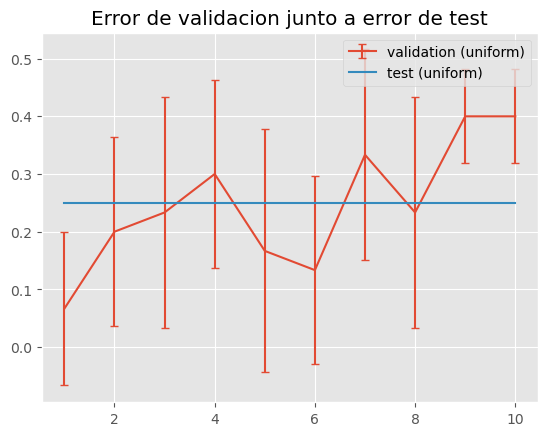

In [24]:
plt.title("Error de validacion junto a error de test")

cv_results_uniform = cv_results[cv_results['param_weights'] == 'uniform']
cv_results_distance = cv_results[cv_results['param_weights'] == 'distance']

test_results_uniform = test_results[test_results['param_weights'] == 'uniform']  # Lo vamos a limitar a `weights = 'uniform'`
test_results_distance = test_results[test_results['param_weights'] == 'distance']  # Lo vamos a limitar a `weights = 'uniform'`

plt.errorbar(cv_results_uniform['param_n_neighbors'],1 - cv_results_uniform['mean_test_score'], cv_results_uniform['std_test_score'], label='validation (uniform)', capsize=3)  # 1 - [] para imprimir el error
# plt.errorbar(cv_results_distance['param_n_neighbors'],1 - cv_results_distance['mean_test_score'], cv_results_distance['std_test_score'], label='validation (distance)', capsize=3)  # 1 - [] para imprimir el error

plt.errorbar(test_results_uniform['param_n_neighbors'],1 - test_results_uniform['mean_test_score'], label='test (uniform)', capsize=3)  # 1 - [] para imprimir el error
# plt.errorbar(test_results_distance['param_n_neighbors'],1 - test_results_distance['mean_test_score'], label='test (distance)', capsize=3)  # 1 - [] para imprimir el error

plt.legend(loc='upper right')
plt.show()

Parece que el menor error de test se obtendría con los mismos hiperparámetros (pero también con otros).

## Almacenamiento y restauración del modelo

Una vez hemos entrenado un modelo, podemos guardarlo para su posterior uso mediante `pickle`. Así no tendremos que reentrenarlo si cerramos la sesión con el Jupyter Notebook.

In [25]:
with open('my_knn_model.pkl', 'wb') as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

Una vez hemos guardado el modelo, podemos cargarlo y utilizarlo para predecir

In [26]:
with open('my_knn_model.pkl', 'rb') as f:
    restored_model = pickle.load(f)

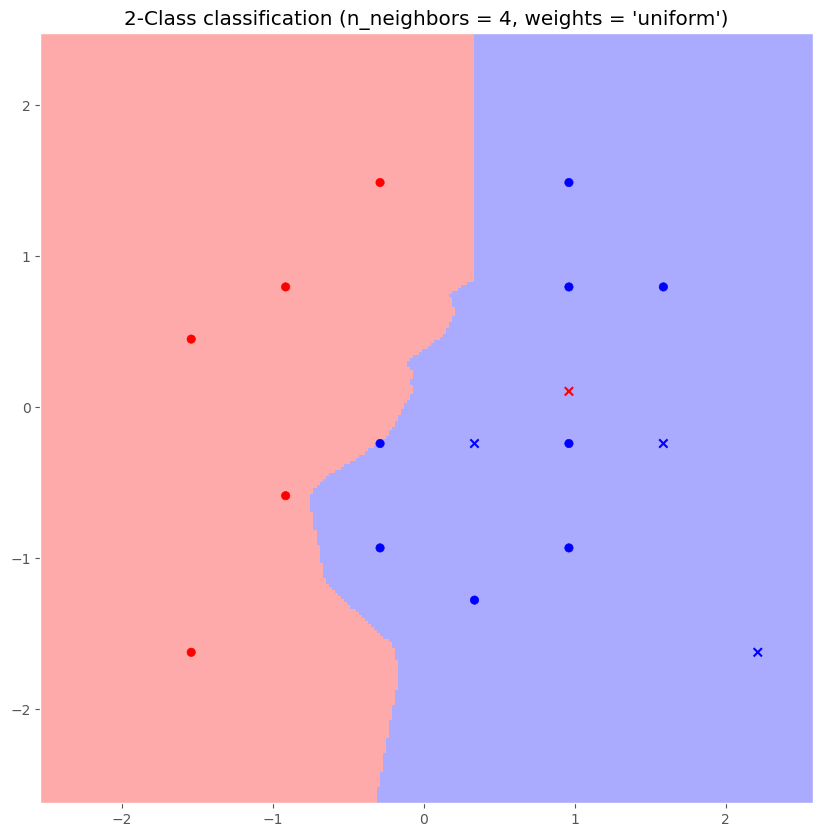

In [27]:
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = matplotlib.colors.ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = matplotlib.colors.ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min = dataset_train_X_scaled[:, 0].min() - 1  # Le sumo y resto 1 para poder ir un poco más allá de los ejemplos y verlo mejor
x_max = dataset_train_X_scaled[:, 0].max() + 1
y_min = dataset_train_X_scaled[:, 1].min() - 1
y_max = dataset_train_X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

np.random.seed(SEED_VALUE)
dense_Z = restored_model.predict(np.c_[xx.ravel(), yy.ravel()])  # *** Nótese que usamos restored_model ***

# Put the result into a color plot
dense_Z = dense_Z.reshape(xx.shape)
plt.figure(figsize=[10, 10])
plt.pcolormesh(xx, yy, dense_Z, cmap=cmap_light)

# Plot the training and test points
# Plot the training and test points
plt.scatter(dataset_train_X_scaled[:, 0], 
            dataset_train_X_scaled[:, 1], 
            c=dataset_train_Y, cmap=cmap_bold, marker="o")
plt.scatter(dataset_test_X_scaled[:, 0], 
            dataset_test_X_scaled[:, 1], 
            c=dataset_test_Y, cmap=cmap_bold, marker="x")
plt.axis('scaled')  # Para que los ejes estén en la misma escala
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (n_neighbors = 4, weights = 'uniform')")

plt.show()